In [ ]:
try:
  !git clone https://github.com/acen20/CNN-Tensorflow-Keras-for-sound-classification Data
  import os
  os.chdir('Data')
except:
  pass 

dataset = 'dataset.npy'

In [ ]:
import librosa, librosa.display
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from tensorflow.python.keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.utils import shuffle

# Feature Extractor
Uncomment the following block to use your own dataset for training

## Directory Heirarchy
Relative to the location of this script, arrange the folders in the following format:

<b>Drone Sounds:</b> audio/Drone/{drone sounds here}

<b>Other Sounds:</b> audio/{Other}/{Other sounds here}

In [ ]:
'''path = "audio/"
min_samples = 22050

waveforms = []
ffts = []
stfts = [] 
f_ffts = []
log_specs = []
MFCCs_list = []


def visualize_signals():
  sample_audio = 1
  FIG_SIZE = (9, 5)

  #Waveform
  plt.figure(figsize = FIG_SIZE)
  waveplot_ = waveforms[sample_audio]
  librosa.display.waveplot(waveplot_[0], sr = waveplot_[1], alpha = 0.4)
  plt.xlabel("Time (s)")
  plt.ylabel("Amplitude")
  plt.title("Waveform")
  plt.show()

  #Fourier Transformation
  fourier1 = f_ffts[sample_audio]
  plt.figure(figsize=FIG_SIZE)
  plt.plot(fourier1[0], fourier1[1], alpha=0.7, color = "C5")
  plt.xlabel("Frequency")
  plt.ylabel("Magnitude")
  plt.title("FFT")
  plt.show()

  #Power Spectrum
  fourier2 = ffts[sample_audio]
  plt.figure(figsize=FIG_SIZE)
  plt.plot(fourier2[0], fourier2[1], alpha=0.7, color = "C5")
  plt.xlabel("Frequency")
  plt.ylabel("Magnitude")
  plt.title("Power Spectrum")
  plt.show()

  #Spectrogram
  plt.figure(figsize = FIG_SIZE)
  spectrogram_ = stfts[sample_audio]
  librosa.display.specshow(spectrogram_[0], sr=spectrogram_[1], hop_length=spectrogram_[2])
  plt.xlabel("Time")
  plt.ylabel("Frequency")
  plt.colorbar()
  plt.title("Spectrogram")

  #Log Spectrogram
  plt.figure(figsize = FIG_SIZE)
  log_spectrogram_ = log_specs[sample_audio]
  librosa.display.specshow(log_spectrogram_[0], sr=log_spectrogram_[1], hop_length=log_spectrogram_[2])
  plt.xlabel("Time")
  plt.ylabel("Frequency")
  plt.colorbar()
  plt.title("Log Spectrogram")

  #MFCCs
  MFCCs_ = MFCCs_list[sample_audio]
  plt.figure(figsize=FIG_SIZE)
  librosa.display.specshow(MFCCs_[0], sr=MFCCs_[1], hop_length=MFCCs_[2])
  plt.xlabel("Time")
  plt.ylabel("MFCC coefficients")
  plt.colorbar()
  plt.title("MFCCs")



def extract_MFCCs(signal, sample_rate):
    waveforms.append([signal, sample_rate]) 
    # FFT -> power spectrum
    # perform Fourier transform
    fft = np.fft.fft(signal)
    magnitude = np.abs(fft)
    frequency = np.linspace(0, sample_rate, len(magnitude))
    f_ffts.append([frequency, magnitude])
    
    # calculate abs values on complex numbers to get magnitude
    spectrum = np.abs(fft)
    
    # half frequency variable
    f = np.linspace(0, sample_rate, len(spectrum))
    left_spectrum = spectrum[:int(len(spectrum)/2)]
    left_f = f[:int(len(spectrum)/2)]
    
    ffts.append([left_f, left_spectrum])
    
    num_mfcc=13 
    n_fft=2048
    hop_length=512
    
    #performing Short-time FT
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    spectrogram = np.abs(stft)
    
    stfts.append([spectrogram, sample_rate, hop_length])
    
    log_spectrogram = librosa.amplitude_to_db(spectrogram)
    
    log_specs.append([log_spectrogram, sample_rate, hop_length])
    
    MFCCs = librosa.feature.mfcc(signal, sample_rate, 
                                 n_mfcc=num_mfcc, n_fft=n_fft,
                                 hop_length=hop_length)
    MFCCs_list.append([MFCCs, sample_rate, hop_length])
    return MFCCs



def preprocess_dataset(dataset_path):
    data = {
        "mapping": [],
        "labels": [],
        "MFCCs": [],
        "files": []
    } 
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        if dirpath is not dataset_path:
            label = dirpath.split("/")[-1]
            data["mapping"].append(label)
            print("\nProcessing: '{}'".format(label))

            # process all audio files in sub-dir and store MFCCs
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path)
                if len(signal) >= min_samples:

                    signal = signal[:min_samples]

                    MFCCs = extract_MFCCs(signal, sample_rate)
                    if label == 'Drone':
                        llabel = 1
                    else:
                        llabel = 0

                    data["MFCCs"].append(MFCCs.T.tolist())
                    data["labels"].append(llabel)
                    data["files"].append(file_path)
                    print("{}: {}".format(file_path, i-1))
                    
    return data
df = preprocess_dataset(path)
mfcc = np.array(df["MFCCs"])
labels = np.array(df["labels"])
data = list(df.items())
an_array = np.array(data)
dataset = "custom.npy"
visualize_signals()
np.save(dataset, an_array)
'''

'path = "audio/"\nmin_samples = 22050\n\nwaveforms = []\nffts = []\nstfts = [] \nf_ffts = []\nlog_specs = []\nMFCCs_list = []\n\n\ndef visualize_signals():\n  sample_audio = 1\n  FIG_SIZE = (9, 5)\n\n  #Waveform\n  plt.figure(figsize = FIG_SIZE)\n  waveplot_ = waveforms[sample_audio]\n  librosa.display.waveplot(waveplot_[0], sr = waveplot_[1], alpha = 0.4)\n  plt.xlabel("Time (s)")\n  plt.ylabel("Amplitude")\n  plt.title("Waveform")\n  plt.show()\n\n  #Fourier Transformation\n  fourier1 = f_ffts[sample_audio]\n  plt.figure(figsize=FIG_SIZE)\n  plt.plot(fourier1[0], fourier1[1], alpha=0.7, color = "C5")\n  plt.xlabel("Frequency")\n  plt.ylabel("Magnitude")\n  plt.title("FFT")\n  plt.show()\n\n  #Power Spectrum\n  fourier2 = ffts[sample_audio]\n  plt.figure(figsize=FIG_SIZE)\n  plt.plot(fourier2[0], fourier2[1], alpha=0.7, color = "C5")\n  plt.xlabel("Frequency")\n  plt.ylabel("Magnitude")\n  plt.title("Power Spectrum")\n  plt.show()\n\n  #Spectrogram\n  plt.figure(figsize = FIG_SIZE)\n 

# CNN Training
From the top contended (SVM with RBF kernel, Naive Bayes and CNN) algorithms, CNN was chosen for deployment due to its highly discriminative performance

In [ ]:
dataset_ = np.load(dataset, allow_pickle = True)

In [ ]:
labels = np.array(dataset_[1][1])
mfcc = np.array(dataset_[2][1])
labels, mfcc = shuffle(labels, mfcc, random_state = 42)
breakpoint_ = 6 #To Manually split samples into traning and test sets. The integer specifies num of testing samples
test_X = mfcc[:breakpoint_]
mfcc = mfcc[breakpoint_:]
test_y = labels[:breakpoint_]
labels = labels[breakpoint_:]
print(mfcc.shape)
print(labels.shape)
print(test_X.shape)
print(test_y.shape)

(172, 44, 13)
(172,)
(6, 44, 13)
(6,)


In [ ]:
mfcc.shape

(172, 44, 13)

In [ ]:
unique, counts = np.unique(labels, return_counts=True)
unique, counts

(array([0, 1]), array([88, 84]))

In [ ]:
classes = np.unique(labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  2
Output classes :  [0 1]


In [ ]:
train_X = mfcc.reshape(-1, 44, 13, 1)
test_X = test_X.reshape(-1, 44, 13, 1)
train_X.shape

(172, 44, 13, 1)

In [ ]:
train_Y_one_hot = to_categorical(labels)
test_y_one_hot = to_categorical(test_y)

In [ ]:
test_y_one_hot.shape

(6, 2)

In [ ]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.20, random_state=42)

In [ ]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((137, 44, 13, 1), (35, 44, 13, 1), (137, 2), (35, 2))

In [ ]:
batch_size = 32
epochs = 100
num_classes = 2

In [ ]:
model_ = Sequential()
model_.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(44,13,1),padding='same'))
model_.add(LeakyReLU(alpha=0.1))
model_.add(MaxPooling2D((2, 2),padding='same'))
model_.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model_.add(LeakyReLU(alpha=0.1))
model_.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model_.add(LeakyReLU(alpha=0.1))                  
model_.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_.add(Flatten())
model_.add(Dense(128, activation='linear'))
model_.add(LeakyReLU(alpha=0.1))                  
model_.add(Dense(num_classes, activation='softmax'))

In [ ]:
model_.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])

In [ ]:
lfo_train = model_.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/100
5/5 [==============================] - 1s 115ms/step - loss: 23.2481 - accuracy: 0.5036 - val_loss: 8.4744 - val_accuracy: 0.4571
Epoch 2/100
5/5 [==============================] - 0s 61ms/step - loss: 7.9893 - accuracy: 0.5036 - val_loss: 0.4527 - val_accuracy: 0.7143
Epoch 3/100
5/5 [==============================] - 0s 55ms/step - loss: 1.0211 - accuracy: 0.6715 - val_loss: 0.5711 - val_accuracy: 0.6857
Epoch 4/100
5/5 [==============================] - 0s 56ms/step - loss: 0.5086 - accuracy: 0.7226 - val_loss: 0.5700 - val_accuracy: 0.6286
Epoch 5/100
5/5 [==============================] - 0s 60ms/step - loss: 0.4489 - accuracy: 0.7445 - val_loss: 0.3407 - val_accuracy: 0.8286
Epoch 6/100
5/5 [==============================] - 0s 56ms/step - loss: 0.2787 - accuracy: 0.8832 - val_loss: 0.4305 - val_accuracy: 0.8286
Epoch 7/100
5/5 [==============================] - 0s 55ms/step - loss: 0.2937 - accuracy: 0.8686 - val_loss: 0.2625 - val_accuracy: 0.8857
Epoch 8/100
5/5 [=

In [ ]:
model_.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 44, 13, 32)        320       
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 44, 13, 32)        0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 22, 7, 32)         0         
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 22, 7, 64)         18496     
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 22, 7, 64)         0         
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 11, 4, 64)         0         
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 11, 4, 128)        7

In [ ]:
test_X.shape
test_y_one_hot.shape

(6, 2)

In [ ]:
test_eval = model_.evaluate(test_X, test_y_one_hot, verbose=0)

In [ ]:
test_eval

[6.901703454786912e-05, 1.0]

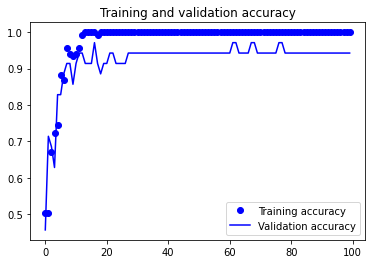

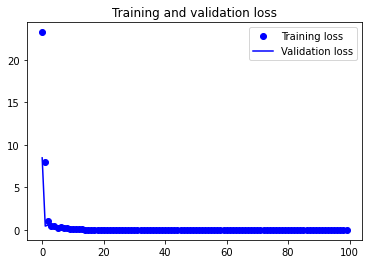

In [ ]:
accuracy = lfo_train.history['accuracy']
val_accuracy = lfo_train.history['val_accuracy']
loss = lfo_train.history['loss']
val_loss = lfo_train.history['val_loss']
epochss = range(len(accuracy))
plt.plot(epochss, accuracy, 'bo', label='Training accuracy')
plt.plot(epochss, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochss, loss, 'bo', label='Training loss')
plt.plot(epochss, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

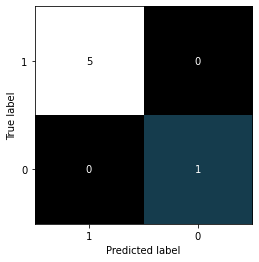

In [ ]:
predicted_classes = model_.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
ConfusionMatrixDisplay.from_predictions(test_y, predicted_classes, labels = [1,0], cmap="cubehelix", colorbar = 0)

In [ ]:
test_acc = len(np.where(predicted_classes == test_y)[0]) / len(test_y)
print(f'CM Acc: {test_acc}')

CM Acc: 1.0


# Adding the dropout layer to evaluate generalization

In [ ]:
#adding dropout layer
model_ = Sequential()
model_.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(44,13,1)))
model_.add(LeakyReLU(alpha=0.1))
model_.add(MaxPooling2D((2, 2),padding='same'))
model_.add(Dropout(0.25))
model_.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model_.add(LeakyReLU(alpha=0.1))
model_.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_.add(Dropout(0.25))
model_.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model_.add(LeakyReLU(alpha=0.1))                  
model_.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_.add(Dropout(0.4))
model_.add(Flatten())
model_.add(Dense(128, activation='linear'))
model_.add(LeakyReLU(alpha=0.1))           
model_.add(Dropout(0.3))
model_.add(Dense(num_classes, activation='softmax'))

In [ ]:
model_.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam",metrics=['accuracy'])

In [ ]:
lfo_train_dropout = model_.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/100
5/5 [==============================] - 1s 104ms/step - loss: 21.3382 - accuracy: 0.5474 - val_loss: 9.1844 - val_accuracy: 0.5429
Epoch 2/100
5/5 [==============================] - 0s 62ms/step - loss: 10.9645 - accuracy: 0.4599 - val_loss: 2.0882 - val_accuracy: 0.4857
Epoch 3/100
5/5 [==============================] - 0s 58ms/step - loss: 3.8279 - accuracy: 0.5839 - val_loss: 1.6194 - val_accuracy: 0.5429
Epoch 4/100
5/5 [==============================] - 0s 58ms/step - loss: 2.0410 - accuracy: 0.6058 - val_loss: 0.5017 - val_accuracy: 0.7429
Epoch 5/100
5/5 [==============================] - 0s 60ms/step - loss: 1.0280 - accuracy: 0.6642 - val_loss: 0.4534 - val_accuracy: 0.7143
Epoch 6/100
5/5 [==============================] - 0s 58ms/step - loss: 1.2182 - accuracy: 0.6058 - val_loss: 0.6422 - val_accuracy: 0.5714
Epoch 7/100
5/5 [==============================] - 0s 60ms/step - loss: 0.8217 - accuracy: 0.6496 - val_loss: 0.5019 - val_accuracy: 0.8000
Epoch 8/100
5/5 [

In [ ]:
test_eval = model_.evaluate(test_X, test_y_one_hot, verbose=1)

1/1 [==============================] - 0s 21ms/step - loss: 2.9913e-04 - accuracy: 1.0000


In [ ]:
test_eval

[0.00029913129401393235, 1.0]

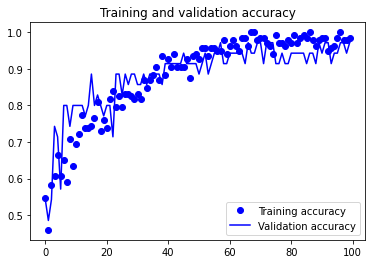

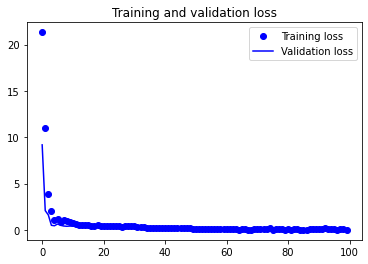

In [ ]:
accuracy = lfo_train_dropout.history['accuracy']
val_accuracy = lfo_train_dropout.history['val_accuracy']
loss = lfo_train_dropout.history['loss']
val_loss = lfo_train_dropout.history['val_loss']
epochss = range(len(accuracy))
plt.plot(epochss, accuracy, 'bo', label='Training accuracy')
plt.plot(epochss, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochss, loss, 'bo', label='Training loss')
plt.plot(epochss, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predicted_classes = model_.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
correct = np.where(predicted_classes==test_y)[0]
print(len(correct)/len(predicted_classes))

1.0


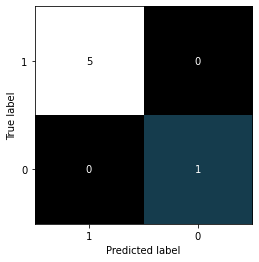

In [ ]:
predicted_classes = model_.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
ConfusionMatrixDisplay.from_predictions(test_y, predicted_classes, labels = [1,0], cmap="cubehelix", colorbar = 0)

In [ ]:
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00         1
     Class 1       1.00      1.00      1.00         5

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

